In [11]:
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
ranking_features_df= pd.read_csv(os.path.join('generated_data', 'ranking_features.csv'), index_col=0, parse_dates=['Date', 'release_date'])
ranking_features_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date,danceability,valence,energy,id
0,1,Échame La Culpa,"Luis Fonsi, Demi Lovato",26459,1zsG4eaZmkA1dvjDDsAGLK,2018-01-01,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
1,2,Échame La Culpa,"Luis Fonsi, Demi Lovato",24103,1zsG4eaZmkA1dvjDDsAGLK,2018-01-02,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
2,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24702,1zsG4eaZmkA1dvjDDsAGLK,2018-01-03,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
3,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24584,1zsG4eaZmkA1dvjDDsAGLK,2018-01-04,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK
4,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",25531,1zsG4eaZmkA1dvjDDsAGLK,2018-01-05,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,1zsG4eaZmkA1dvjDDsAGLK


In [13]:
ranking_features_df[(ranking_features_df['Region']=='Spain') & (ranking_features_df['Date']=='2020-09-01')]['Position'].nunique()

200

In [22]:
song_genres_df= pd.read_csv(os.path.join('raw_data', 'songs_genres_2017_2021.csv'))
song_genres_df.columns= 'song_id genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7 genre_8'.split()
song_genres_df.head()

,song_id,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,4O4Z8VFczL8MxIOmqVWc1b,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7Il2yWQmsqKgSkLQvHTPUI,pop,country,NaN,NaN,NaN,NaN,NaN,NaN
2,6tHWl8ows5JOZq9Yfaqn3M,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3p0Y1C5jhaqyKW7d9oskXA,rap,hip-hop,NaN,NaN,NaN,NaN,NaN,NaN
4,2yQZwi1P8AkkxxFhQ8rMEK,pop,country,NaN,NaN,NaN,NaN,NaN,NaN


## Read genres cluster

In [25]:
import json

with open(os.path.join('raw_data','music_styles_unique.json'), 'r') as f:
    styles_json = json.load(f)

In [26]:
styles_json

{'pop': ['pop rock',
  'pop',
  'british',
  'j-pop',
  'k-pop',
  'mandopop',
  'cantopop'],
 'hip-hop': ['hip-hop', 'funk', 'trap', 'rap'],
 'rock': ['rock',
  'rockabilly',
  'metal',
  'punk',
  'metalcore',
  'hardcore',
  'j-rock',
  'grunge'],
 'electronic': ['trance',
  'chill',
  'dance',
  'edm',
  'house',
  'dubstep',
  'dancehall',
  'electro',
  'techno',
  'electronic',
  'club'],
 'latin': ['latin',
  'reggaeton',
  'spanish',
  'pagode',
  'cumbia',
  'salsa',
  'latino',
  'sertanejo',
  'mpb'],
 'indie': ['anime', 'indie', 'alternative', 'emo'],
 'classical and ost': ['soundtracks', 'classical', 'piano', 'ambient'],
 'folk/traditional': ['folk',
  'country',
  'singer-songwriter',
  'german',
  'corrido',
  'forro',
  'swedish',
  'turkish',
  'french',
  'malay',
  'ranchera'],
 'rythm and blues': ['blues',
  'disco',
  'gospel',
  'ska',
  'groove',
  'r-n-b',
  'jazz',
  'soul',
  'reggae'],
 'miscellaneous': ['acoustic', 'happy', 'comedy', 'sad']}

In [27]:
def map_genres(genre):
    for main_genre, genre_lst in styles_json.items():
        if genre in genre_lst:
            return main_genre
    
    return genre

In [28]:
main_song_genres_df= song_genres_df.applymap(lambda x: map_genres(x))

In [29]:
main_song_genres_df.head()

,song_id,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,4O4Z8VFczL8MxIOmqVWc1b,rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7Il2yWQmsqKgSkLQvHTPUI,pop,folk/traditional,NaN,NaN,NaN,NaN,NaN,NaN
2,6tHWl8ows5JOZq9Yfaqn3M,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3p0Y1C5jhaqyKW7d9oskXA,hip-hop,hip-hop,NaN,NaN,NaN,NaN,NaN,NaN
4,2yQZwi1P8AkkxxFhQ8rMEK,pop,folk/traditional,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
main_song_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23300 entries, 0 to 23299
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   song_id  23300 non-null  object
 1   genre_1  21375 non-null  object
 2   genre_2  7367 non-null   object
 3   genre_3  2884 non-null   object
 4   genre_4  779 non-null    object
 5   genre_5  205 non-null    object
 6   genre_6  34 non-null     object
 7   genre_7  10 non-null     object
 8   genre_8  1 non-null      object
dtypes: object(9)
memory usage: 1.6+ MB


## Merge songs and genres

In [30]:
ranking_features_and_genre_df = ranking_features_df.merge(main_song_genres_df, left_on='song_id', right_on='song_id', how='left')
ranking_features_and_genre_df = ranking_features_and_genre_df.drop(columns='id')

In [31]:
ranking_features_and_genre_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date,danceability,valence,energy,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,1,Échame La Culpa,"Luis Fonsi, Demi Lovato",26459,1zsG4eaZmkA1dvjDDsAGLK,2018-01-01,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Échame La Culpa,"Luis Fonsi, Demi Lovato",24103,1zsG4eaZmkA1dvjDDsAGLK,2018-01-02,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24702,1zsG4eaZmkA1dvjDDsAGLK,2018-01-03,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",24584,1zsG4eaZmkA1dvjDDsAGLK,2018-01-04,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Échame La Culpa,"Luis Fonsi, Demi Lovato",25531,1zsG4eaZmkA1dvjDDsAGLK,2018-01-05,Ecuador,1zsG4eaZmkA1dvjDDsAGLK,2017-11-17,0.724,0.64,0.895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ranking_features_and_genre_df= ranking_features_and_genre_df[ranking_features_and_genre_df['genre_1'].notna()]
ranking_features_and_genre_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date,danceability,valence,energy,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
16453,4,Criminal,"Natti Natasha, Ozuna",22060,6Za3190Sbw39BBC77WSS1C,2018-01-01,Ecuador,6Za3190Sbw39BBC77WSS1C,2017-11-10,0.814,0.839,0.813,latin,latin,NaN,NaN,NaN,NaN,NaN,NaN
16454,4,Criminal,"Natti Natasha, Ozuna",18610,6Za3190Sbw39BBC77WSS1C,2018-01-02,Ecuador,6Za3190Sbw39BBC77WSS1C,2017-11-10,0.814,0.839,0.813,latin,latin,NaN,NaN,NaN,NaN,NaN,NaN
16455,5,Criminal,"Natti Natasha, Ozuna",19107,6Za3190Sbw39BBC77WSS1C,2018-01-03,Ecuador,6Za3190Sbw39BBC77WSS1C,2017-11-10,0.814,0.839,0.813,latin,latin,NaN,NaN,NaN,NaN,NaN,NaN
16456,6,Criminal,"Natti Natasha, Ozuna",18970,6Za3190Sbw39BBC77WSS1C,2018-01-04,Ecuador,6Za3190Sbw39BBC77WSS1C,2017-11-10,0.814,0.839,0.813,latin,latin,NaN,NaN,NaN,NaN,NaN,NaN
16457,5,Criminal,"Natti Natasha, Ozuna",20076,6Za3190Sbw39BBC77WSS1C,2018-01-05,Ecuador,6Za3190Sbw39BBC77WSS1C,2017-11-10,0.814,0.839,0.813,latin,latin,NaN,NaN,NaN,NaN,NaN,NaN


## Plot genre evolution

In [33]:
genre_colors= {'classical and ost': 'grey', 'electronic': 'orange', 'folk/traditional': 'yellow', 
               'hip-hop': 'red', 'indie': 'black', 'latin': 'blue', 'miscellaneous': 'purple',
               'pop': 'green', 'rock': 'brown', 'rythm and blues': 'cyan'}

In [34]:
def plot_genre_evol(songs_df, country_lst, resample_freq='M'):
    
    genre_colors= {'classical and ost': 'grey', 'electronic': 'orange', 'folk/traditional': 'yellow', 
               'hip-hop': 'tab:red', 'indie': 'black', 'latin': 'blue', 'miscellaneous': 'purple',
               'pop': 'green', 'rock': 'brown', 'rythm and blues': 'cyan'}
    
    if country_lst is not None:
        country_ranking = songs_df[songs_df['Region'].isin(country_lst)]
    else:
        country_ranking = songs_df
    
    genre_1= country_ranking.groupby('Date genre_1'.split()).size().to_frame().reset_index()
    genre_1.columns= 'date genre count'.split()
    genre_1=genre_1.pivot(index='date', columns='genre', values='count').fillna(0)
    
    country_ranking_aux= country_ranking[country_ranking['genre_2'].notna()]
    country_ranking_aux= country_ranking_aux[country_ranking_aux['genre_1']!=country_ranking_aux['genre_2']]
    genre_2=country_ranking_aux.groupby('Date genre_2'.split()).size().to_frame().reset_index()
    genre_2.columns= 'date genre count'.split()
    genre_2=genre_2.pivot(index='date', columns='genre', values='count').fillna(0)

    total=genre_1+genre_2
    #Remove genres whose values are all NaN
    total= total.dropna(axis=1, how='all')
    total = total.fillna(0.0)
    
    if resample_freq:
        total = total.resample(resample_freq).mean()
    
    total_rescaled= total.div(total.sum(axis=1), axis=0)
    
    colors_= []
    for g in total.columns.to_list():
        try:
            colors_.append(genre_colors[g])
        except:
            colors_.append('pink')
    
    fig = plt.figure(figsize=(15,5))
    plt.tight_layout()
    plt.grid(True);
    ax = fig.add_subplot(1,1,1)
    ax.stackplot(total_rescaled.index.values, 
                 total_rescaled.T.values, 
                 labels=total.columns.to_list(), 
                 colors= colors_)
    ax.legend(loc='upper left')
    ax.set_xlabel('Date', fontsize=16)
    ax.set_ylabel('Rate', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

### Global plot

<ipython-input-34-d61a167f6551>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


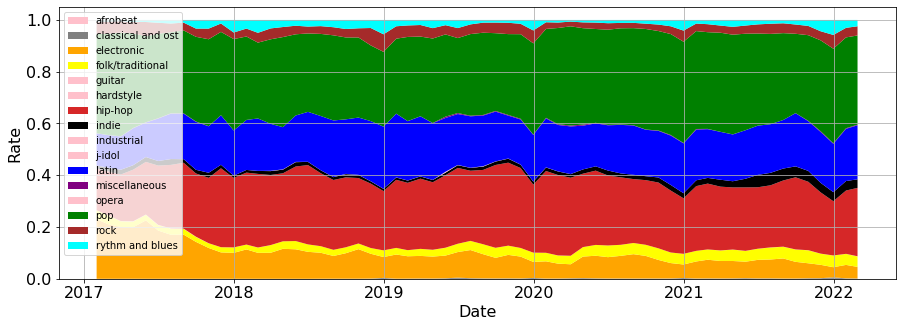

In [35]:
plot_genre_evol(ranking_features_and_genre_df, country_lst=None)

### Continent-based evolution

In [36]:
continents = {}
continents['europe']=['Portugal', 'Italy', 'Germany', 'Finland', 'Estonia', 'Hungary', 
                      'Spain', 'Slovakia', 'Ireland', 'Iceland', 'France',  'Norway', 
                      'Lithuania', 'Turkey', 'Switzerland', 'Belgium', 'Denmark',  
                      'Poland', 'Austria', 'Sweden', 'CzechRepublic', 'Netherlands',
                      'UnitedKingdom',  'Latvia', 'Greece', 'Luxemborg']
continents['north_america']= 'USA Canada'.split()
continents['south_america']=['Ecuador', 'Panama', 'Peru',  'Uruguay', 'CostaRica',
                            'Mexico', 'Argentina', 'ElSalvador', 'Chile', 'Brazil', 
                            'Honduras', 'Guatemala','Bolivia', 'Columbia','DominicanRepublic', 'Paraguay']
continents['oceania']='Australia NewZealand'.split()
continents['asia']= ['Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Japan', 'Singapore', 'HongKong']

<ipython-input-34-d61a167f6551>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


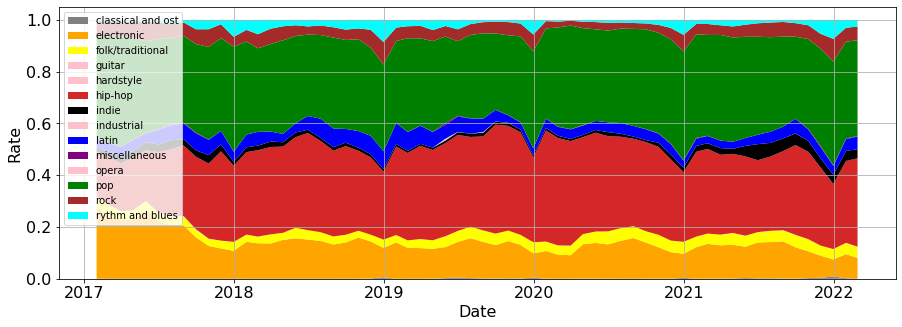

In [37]:
plot_genre_evol(ranking_features_and_genre_df, country_lst=continents['europe'])

<ipython-input-34-d61a167f6551>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


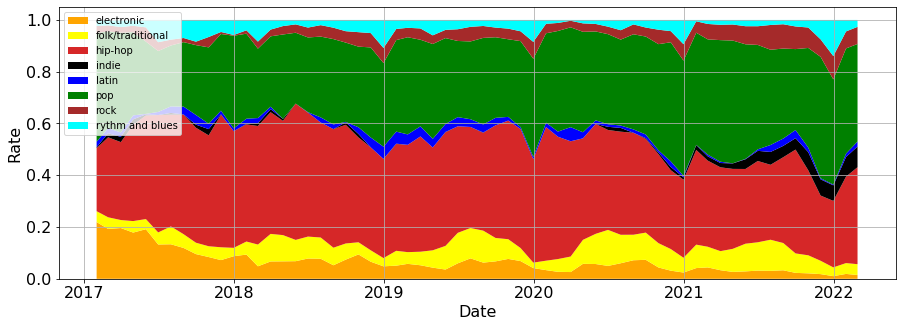

In [38]:
plot_genre_evol(ranking_features_and_genre_df, country_lst=continents['north_america'])

<ipython-input-34-d61a167f6551>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


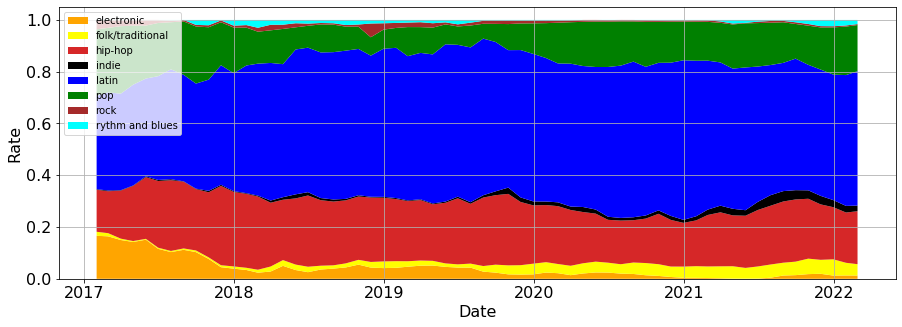

In [39]:
plot_genre_evol(ranking_features_and_genre_df, country_lst=continents['south_america'])

<ipython-input-34-d61a167f6551>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


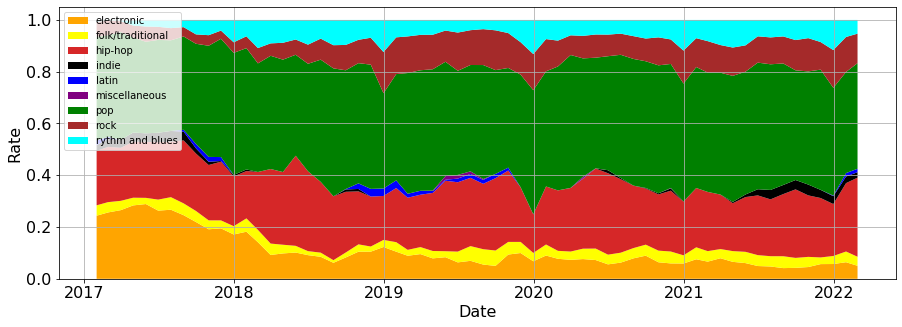

In [40]:
plot_genre_evol(ranking_features_and_genre_df, country_lst=continents['oceania'])

<ipython-input-34-d61a167f6551>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


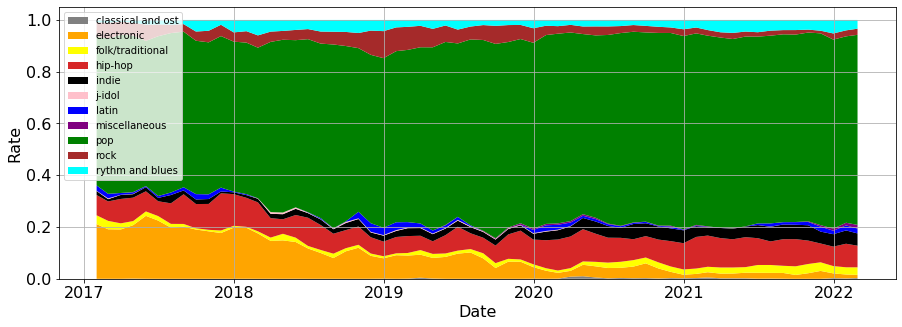

In [41]:
plot_genre_evol(ranking_features_and_genre_df, country_lst=continents['asia'])

### Spain

<ipython-input-34-d61a167f6551>:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


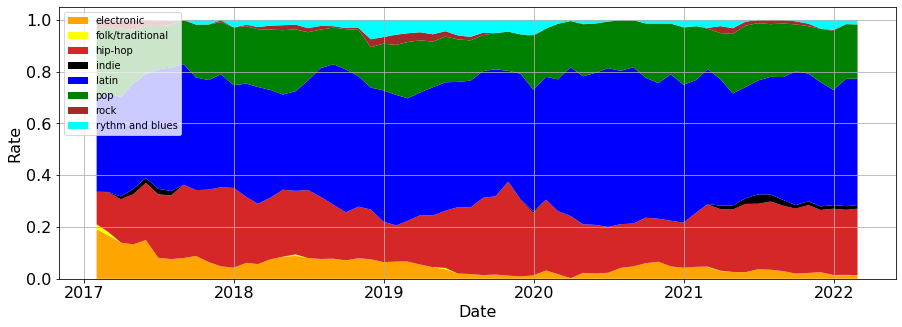

In [42]:
plot_genre_evol(ranking_features_and_genre_df, ['Spain'])

In [43]:
print("That's all folks!")

That's all folks!
